Program setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Generate a dataset

In [ ]:
def origin_func(x):
  return .5+.4*np.sin(2*np.pi*x)

# Define a function to generate the data
def generate_data(num_points) :
  points = [[] for _ in range(num_points)]
  for i in range(num_points):
    noise = np.random.rand()*2-1
    x = np.random.rand()
    y = origin_func(x) + noise
    points[i] = [x, y]
  points = np.asarray(points)
  return points[:, 0].flatten(), points[:, 1].flatten()


Build the model and initialize parameters

In [73]:
""" Functions that build and Initialize the model """

# Performs a simple kmeans algorithm on the dataset assuming X is 1 dimensional
def kmeans(X, k, max_iterations=100):
  # Initialize centroids randomly
  centroids = X[np.random.choice(range(len(X)), k, replace=False)] 
  # Iteratively find centroids
  for i in range(max_iterations):
    # Assign each datapoint to the nearest centroid
    C = np.argmin(np.abs(X[:, np.newaxis] - centroids), axis=1)
    # Update centroids as the mean of the assigned datapoints
    centroids_new = np.array([X[C == j].mean() for j in range(k)])
    # Check for convergence
    if np.allclose(centroids, centroids_new): break
    # Update centroids
    centroids = centroids_new
  return C, centroids

def cluster_variance(X, assignments, centroids):
    # Calculate the squared distances between each point and its assigned centroid
    distances = np.square(centroids[assignments] - X)
    # Calculate the variance of each cluster
    variances = [distances[assignments == i].mean() for i in range(len(centroids))]
    # Check if any cluster contains only one sample point
    single_point_clusters = [i for i in range(len(centroids)) if np.sum(assignments == i) == 1]
    # If a cluster contains only one sample point, use the mean variance of all other clusters
    for i in single_point_clusters:
        variances[i] = np.mean(variances)
    return np.sqrt(variances)

# Initialize and return hyper parameters
def init_hypers(model, X, k):
  # Determine kernel centroids
  C, centroids = kmeans(X, kernel_num)
  # Determine cluster variance
  variances = cluster_variance(X, C, centroids)
  return (centroids, variances)

# Build and return the network of weights and biases
def build_model(network_inputs, layer_sizes):
  # Build the model layer by layer
  weights = []
  for l in range(len(layer_sizes)):
    inputs = network_inputs if l == 0 else layer_sizes[l-1] # Define the number of inputs for each layer
    neurons = layer_sizes[l] # Define the number of neurons
    layer = np.asarray([[None for _ in range(inputs + 1)] for _ in range(neurons)]) # Create an array containing the weights for each neuron in the layer including bias
    weights.append(layer) # Add the layer to the weights
  rbf_init_params(weights) # HARDCODED: initialization
  return weights

# HARDCODED: only in this RBF model
def rbf_init_params(model):
  # first layer weights and bias leaves input unchanged
  model[0][:, 1:].fill(1)
  model[0][:, 0].fill(0)
  # initialize the second layer weights randomly
  for neuron in range(len(model[1])):
    for weight in range(len(model[1][neuron])):
      model[1][neuron, weight] = np.random.rand()*2-1


Define neccesary functions for rbf usage

In [ ]:

# Calculates the mean squared error (MSE) between the predicted output and the true output for a set of input examples.
def mse(y_true, y_pred):
    return np.mean(np.square(y_pred - y_true), axis = 1)

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# forward pass algorithm
def rbf_forward_pass(model, X, hypers):
  cache = [] #Initialize the empty cache
  for layer in range(len(model)): # Iterate through every layer
    inputs = np.array(X, dtype=np.float64) if layer == 0 else cache[layer-1][1]
    if layer == 0 and X.ndim == 1: inputs = inputs[:, np.newaxis] # Handle inputs that have a single dimension
    weight_matrix = model[layer].astype(np.float64) # Grab all the weights & biases from the layer
    layer_bias = weight_matrix[:, 0] # Extract bias from the layer
    layer_weights = weight_matrix[:, 1:]  # Extract weights from the layer
    hypothesis = np.dot(inputs, layer_weights.T) + layer_bias # Compute the linear hypothesyses
    input_cache = (inputs, weight_matrix) # Box up and store variables used in calculation
    activation_cache = gaussian(hypothesis, hypers[0], hypers[1]) if not layer == len(model) - 1 else hypothesis # HARDCODED: Compute activation_cache (UNUSED IN OUTPUT LAYER) (RBF SPECIFIC)
    cache.append((input_cache, activation_cache, layer)) # HARDCODED: (kinda) added layer to each cache
  return cache

# Update the weights using the gradients
def rbf_update_layer(model, gradient, learning_rate, layer):
  #print(model[layer][:, 1:])
  model[layer][:, 1:] = model[layer][:, 1:] - learning_rate*gradient[0] # Update Weights
  model[layer][:, 0] = model[layer][:, 0] - learning_rate*gradient[1] # Update Bias

# Calculate the gradient for a single layer
def rbf_calc_gradient(cache, hypers, labels):
  # Unbox cache
  input_cache, activation_cache, layer = cache
  # Unbox input_cache
  input, weight_matrix = input_cache
  # Unbox param matrix
  layer_bias = weight_matrix[:, 0] # Extract bias from the layer
  layer_weights = weight_matrix[:, 1:]  # Extract weights from the layer
  # Unbox hypers
  centroids = hypers[0]
  variances = hypers[1]
  # Calculate error
  error =  caches[len(caches)-1][1] - labels[:, np.newaxis]
  # Calculate gradients
  dw = ((1/input.shape[1]) * np.sum(error * input, axis=0))#[np.newaxis]#.reshape(layer_weights.shape)
  db = (1/input.shape[1]) * np.sum(error, axis=0, keepdims=True)
  return (dw, db)


Train the model

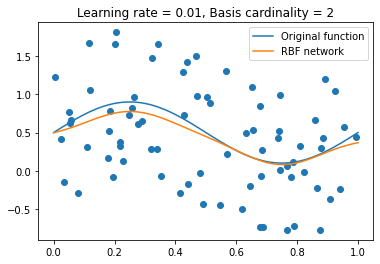

learning rate = 0.01 # of kernels = 2 Total Error:0.4791972775805099


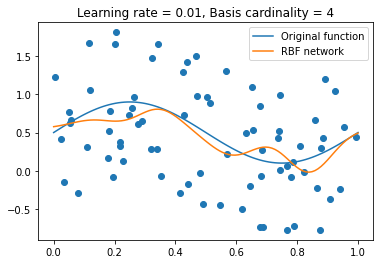

learning rate = 0.01 # of kernels = 4 Total Error:0.4759556281570756


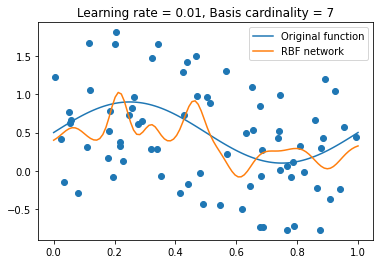

learning rate = 0.01 # of kernels = 7 Total Error:0.4990399321982035


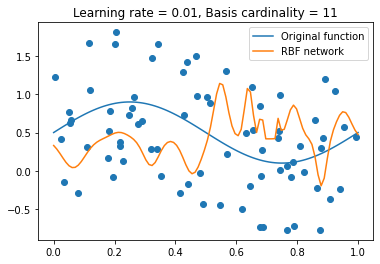

learning rate = 0.01 # of kernels = 11 Total Error:0.527210037470194


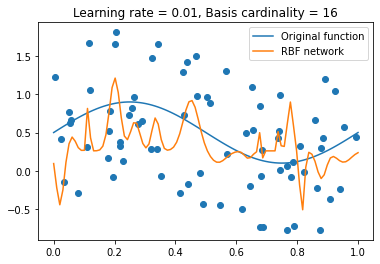

learning rate = 0.01 # of kernels = 16 Total Error:0.5360525356614787


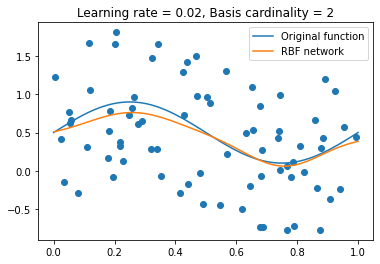

learning rate = 0.02 # of kernels = 2 Total Error:0.47988893468441035


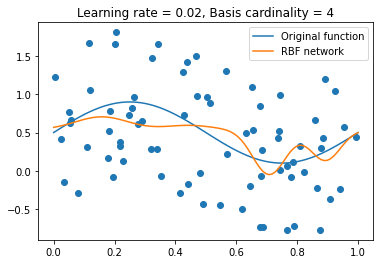

learning rate = 0.02 # of kernels = 4 Total Error:0.47042918982069626


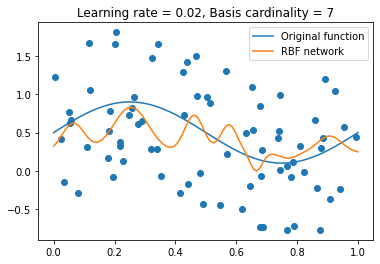

learning rate = 0.02 # of kernels = 7 Total Error:0.46288905821985005


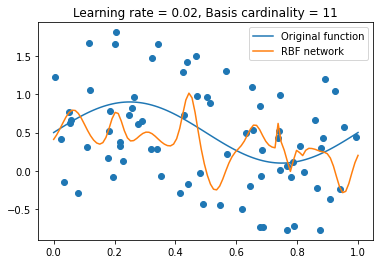

learning rate = 0.02 # of kernels = 11 Total Error:0.49824478050743654


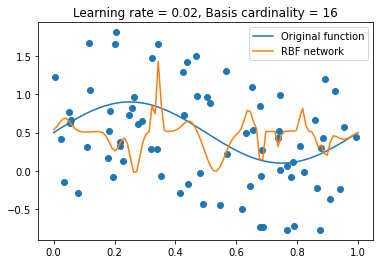

learning rate = 0.02 # of kernels = 16 Total Error:0.49032399515901387


In [74]:
# OPTIONS
EPOCHS = 100
learning_rates = [.01, .02]
basis_cardinalities = [2, 4, 7, 11, 16]
data_points = 75

# Generate data
X, Y = generate_data(data_points)

# Initialize variants
for rate in learning_rates:
  for kernel_num in basis_cardinalities:
    params = build_model(1, [kernel_num, 1])
    hyper_params = init_hypers(params, X, kernel_num)
    
    # Determine Weights & Biases (train params)
    for epoch in range(EPOCHS):
      caches = rbf_forward_pass(params, X, hyper_params) # Results of forward pass
      grad = rbf_calc_gradient(caches[1], hyper_params, Y) # Gradients
      rbf_update_layer(params, grad, rate, 1) # Update the weights with the calculated gradients

    # Plot the results
    x_plot = np.linspace(0, 1, 100)
    y_original = origin_func(x_plot)
    y_prediction = rbf_forward_pass(params, x_plot, hyper_params)[len(params)-1][1]
    plt.scatter(X, Y)
    plt.plot(x_plot, y_original, label='Original function')
    plt.plot(x_plot, y_prediction, label='RBF network')
    plt.title(f'Learning rate = {rate}, Basis cardinality = {kernel_num}')
    plt.legend()
    plt.show()

    # Display Results
    yhat = rbf_forward_pass(params, X, hyper_params)[len(params)-1][1]
    error = np.mean(mse(Y, yhat), axis=0)
    if np.isnan(error): print(":(")
    print("learning rate = " + str(rate) + " # of kernels = " + str(kernel_num) + "Average Error" + str(error))
    
    

